In [155]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf


mpl.rcParams['figure.figsize']=[10,8]
mpl.rcParams['axes.grid']=False

In [156]:
# importer la base de données
db =pd.read_csv('DonnesNetatmo27avril.csv', sep=";" )
#db=db.stack().str.replace(',','.').unstack()
db1=db


db=db.drop(['time'],axis=1)
#db_date=db['Date/Heure']
#db1=db.iloc[1:]

db.iloc[:,:] = db.iloc[:,:].astype(float)
db['time']=pd.to_datetime(db1['time'], infer_datetime_format=True)
df=db

# periode avril octobre
#db1=db1[2200:6600]

# préparation de la base de données

#X=db.drop([target],axis=1)


In [157]:
df

,temperature,co2,humidity,noise,Pressure,time
0,23.5,735.0,53.0,34.0,1021.6,2021-03-25 19:22:30
1,20.0,654.0,61.0,33.0,1021.6,2021-03-25 19:27:30
2,19.5,654.0,62.0,33.0,1021.5,2021-03-25 19:32:30
3,19.4,629.0,62.0,33.0,1021.4,2021-03-25 19:37:30
4,19.4,609.0,62.0,32.0,1021.5,2021-03-25 19:42:30
...,...,...,...,...,...,...
12539,19.1,749.0,42.0,42.0,1006.3,2021-04-27 13:38:20
12540,19.1,735.0,43.0,43.0,1006.2,2021-04-27 13:43:20
12541,19.2,757.0,45.0,43.0,1006.2,2021-04-27 13:48:20
12542,19.2,761.0,46.0,40.0,1006.1,2021-04-27 13:53:20


In [158]:
#df['time']=pd.to_datetime(df['Date'], infer_datetime_format=True)

In [159]:
df.columns

Index(['temperature', 'co2', 'humidity', 'noise', 'Pressure', 'time'], dtype='object')

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

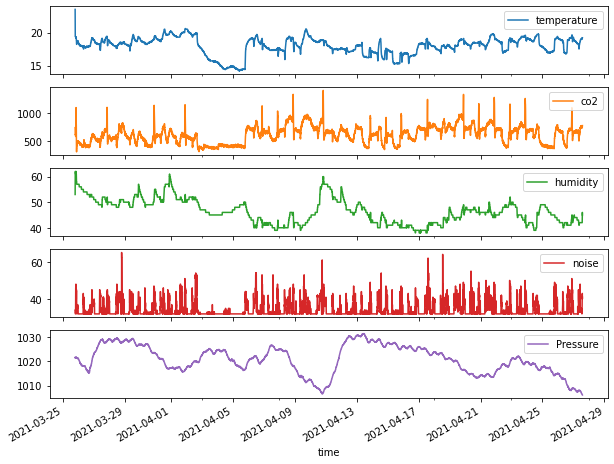

In [160]:
df.set_index('time')[['temperature', 'co2', 'humidity', 'noise', 'Pressure']].plot(subplots=True)

In [161]:
df_input=df[['temperature', 'co2', 'humidity', 'noise', 'Pressure']]



In [162]:
df

,temperature,co2,humidity,noise,Pressure,time
0,23.5,735.0,53.0,34.0,1021.6,2021-03-25 19:22:30
1,20.0,654.0,61.0,33.0,1021.6,2021-03-25 19:27:30
2,19.5,654.0,62.0,33.0,1021.5,2021-03-25 19:32:30
3,19.4,629.0,62.0,33.0,1021.4,2021-03-25 19:37:30
4,19.4,609.0,62.0,32.0,1021.5,2021-03-25 19:42:30
...,...,...,...,...,...,...
12539,19.1,749.0,42.0,42.0,1006.3,2021-04-27 13:38:20
12540,19.1,735.0,43.0,43.0,1006.2,2021-04-27 13:43:20
12541,19.2,757.0,45.0,43.0,1006.2,2021-04-27 13:48:20
12542,19.2,761.0,46.0,40.0,1006.1,2021-04-27 13:53:20


In [163]:
df_input.shape[1]

5

In [164]:
df_input.describe()

,temperature,co2,humidity,noise,Pressure
count,12544.000000,12544.000000,12544.000000,12544.000000,12544.000000
mean,18.002240,612.977838,46.540737,34.286352,1021.035882
std,1.270487,153.543755,4.835879,3.892208,6.028260
min,14.200000,302.000000,38.000000,32.000000,1006.100000
25%,17.400000,502.000000,42.000000,32.000000,1017.000000
50%,18.200000,613.000000,46.000000,32.000000,1021.200000
75%,18.900000,709.000000,50.000000,35.000000,1026.300000
max,23.500000,1402.000000,62.000000,65.000000,1031.500000


In [165]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [166]:
features=data_scaled
target=data_scaled[:,1]

In [167]:
target

array([0.39363636, 0.32      , 0.32      , ..., 0.41363636, 0.41727273,
       0.42727273])

In [168]:
features

array([[1.        , 0.39363636, 0.625     , 0.06060606, 0.61023622],
       [0.62365591, 0.32      , 0.95833333, 0.03030303, 0.61023622],
       [0.56989247, 0.32      , 1.        , 0.03030303, 0.60629921],
       ...,
       [0.53763441, 0.41363636, 0.29166667, 0.33333333, 0.00393701],
       [0.53763441, 0.41727273, 0.33333333, 0.24242424, 0.        ],
       [0.53763441, 0.42727273, 0.29166667, 0.27272727, 0.        ]])

In [169]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[1.        , 0.39363636, 0.625     , 0.06060606, 0.61023622],
         [0.62365591, 0.32      , 0.95833333, 0.03030303, 0.61023622]]]),
 array([0.32]))

In [170]:
x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=0.20, shuffle =False)

In [171]:
win_length=24
batch_size=32
num_features=df_input.shape[1]
train_generator = TimeseriesGenerator(x_train, y_train, length= win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length= win_length, sampling_rate=1, batch_size=batch_size)

In [172]:
#test_generator[0]

In [173]:
train_generator.data

array([[1.        , 0.39363636, 0.625     , 0.06060606, 0.61023622],
       [0.62365591, 0.32      , 0.95833333, 0.03030303, 0.61023622],
       [0.56989247, 0.32      , 1.        , 0.03030303, 0.60629921],
       ...,
       [0.46236559, 0.47636364, 0.375     , 0.36363636, 0.2992126 ],
       [0.4516129 , 0.40090909, 0.375     , 0.33333333, 0.2992126 ],
       [0.43010753, 0.30181818, 0.375     , 0.36363636, 0.29527559]])

In [174]:
num_features

5

In [175]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length,num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))



In [176]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 24, 128)           68608     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 24, 128)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 24, 128)           131584    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 24, 128)           0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 128)           0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)               

In [177]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience=10,
                                                 mode='min')
model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer=tf.optimizers.Adam(),
             metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator, epochs=1000,
                             validation_data=test_generator,
                             shuffle=False,
                             callbacks=[early_stopping])



C:\Users\ahmed\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training_v1.py:1246: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


AttributeError: 'TimeseriesGenerator' object has no attribute 'shape'

In [178]:
model.evaluate_generator(test_generator, verbose=0)

C:\Users\ahmed\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training_v1.py:1279: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


AttributeError: 'TimeseriesGenerator' object has no attribute 'shape'

In [179]:
predictions= model.predict_generator(test_generator)

C:\Users\ahmed\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training_v1.py:1307: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


AttributeError: 'TimeseriesGenerator' object has no attribute 'shape'

In [180]:
type(test_generator)

keras.preprocessing.sequence.TimeseriesGenerator

In [181]:
y_test

array([0.25181818, 0.24818182, 0.23818182, ..., 0.41363636, 0.41727273,
       0.42727273])

In [182]:
x_test[:,1:][win_length:]

array([[0.34818182, 0.33333333, 0.        , 0.31496063],
       [0.34818182, 0.33333333, 0.        , 0.31889764],
       [0.36181818, 0.33333333, 0.        , 0.31889764],
       ...,
       [0.41363636, 0.29166667, 0.33333333, 0.00393701],
       [0.41727273, 0.33333333, 0.24242424, 0.        ],
       [0.42727273, 0.29166667, 0.27272727, 0.        ]])

In [183]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

NameError: name 'predictions' is not defined

In [184]:
pd.DataFrame(predictions)

NameError: name 'predictions' is not defined

In [185]:
rev_trans=scaler.inverse_transform(df_pred)

NameError: name 'df_pred' is not defined

In [186]:
rev_trans

NameError: name 'rev_trans' is not defined

In [187]:
df_final=df_input[predictions.shape[0]*-1:]

NameError: name 'predictions' is not defined

In [188]:
df_final.count()

NameError: name 'df_final' is not defined

In [189]:
df_final['T_Air_pred']=rev_trans[:,0]

NameError: name 'rev_trans' is not defined

In [190]:
df_final

NameError: name 'df_final' is not defined

In [191]:
df_final[['T_Air_pred',"temperature"]].plot()

NameError: name 'df_final' is not defined

In [192]:
errors1 =df_final["co2"]-df_final['T_Air_pred']

NameError: name 'df_final' is not defined

In [193]:
plt.plot(abs(errors1))

NameError: name 'errors1' is not defined

In [194]:
errors1.mean()

NameError: name 'errors1' is not defined

In [195]:
df1=df.copy()

In [196]:
df1.columns=['temp','y','hu','noise','P','ds']

In [197]:
df1

,temp,y,hu,noise,P,ds
0,23.5,735.0,53.0,34.0,1021.6,2021-03-25 19:22:30
1,20.0,654.0,61.0,33.0,1021.6,2021-03-25 19:27:30
2,19.5,654.0,62.0,33.0,1021.5,2021-03-25 19:32:30
3,19.4,629.0,62.0,33.0,1021.4,2021-03-25 19:37:30
4,19.4,609.0,62.0,32.0,1021.5,2021-03-25 19:42:30
...,...,...,...,...,...,...
12539,19.1,749.0,42.0,42.0,1006.3,2021-04-27 13:38:20
12540,19.1,735.0,43.0,43.0,1006.2,2021-04-27 13:43:20
12541,19.2,757.0,45.0,43.0,1006.2,2021-04-27 13:48:20
12542,19.2,761.0,46.0,40.0,1006.1,2021-04-27 13:53:20


In [205]:
!pip install pystan
!pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\ahmed\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ahmed\\AppData\\Local\\Temp\\pip-install-pt3o441e\\fbprophet_6e7fe7c655d94d0a97e2d6d64bc9d0ac\\setup.py'"'"'; __file__='"'"'C:\\Users\\ahmed\\AppData\\Local\\Temp\\pip-install-pt3o441e\\fbprophet_6e7fe7c655d94d0a97e2d6d64bc9d0ac\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\ahmed\AppData\Local\Temp\pip-wheel-emgveigh'
       cwd: C:\Users\ahmed\AppData\Local\Temp\pip-install-pt3o441e\fbprophet_6e7fe7c655d94d0a97e2d6d64bc9d0ac\
  Complete output (11 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  Importing plotly failed. Interactive plots w

In [208]:
import pandas as pd
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [207]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df1)

NameError: name 'Prophet' is not defined

In [57]:
future = m.make_future_dataframe(periods=100,freq='H')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-25 19:22:30,18.238638,17.628415,19.736614,18.238638,18.238638,0.415658,0.415658,0.415658,0.232633,0.232633,0.232633,0.183025,0.183025,0.183025,0.0,0.0,0.0,18.654296
1,2021-03-25 19:25:00,18.237242,17.526743,19.846995,18.237242,18.237242,0.419568,0.419568,0.419568,0.236454,0.236454,0.236454,0.183114,0.183114,0.183114,0.0,0.0,0.0,18.656810
2,2021-03-25 19:27:30,18.235846,17.572517,19.743509,18.235846,18.235846,0.423411,0.423411,0.423411,0.240206,0.240206,0.240206,0.183205,0.183205,0.183205,0.0,0.0,0.0,18.659257
3,2021-03-25 19:30:00,18.234450,17.647308,19.712613,18.234450,18.234450,0.427184,0.427184,0.427184,0.243887,0.243887,0.243887,0.183297,0.183297,0.183297,0.0,0.0,0.0,18.661634
4,2021-03-25 19:32:30,18.233054,17.608320,19.785493,18.233054,18.233054,0.430887,0.430887,0.430887,0.247496,0.247496,0.247496,0.183390,0.183390,0.183390,0.0,0.0,0.0,18.663940


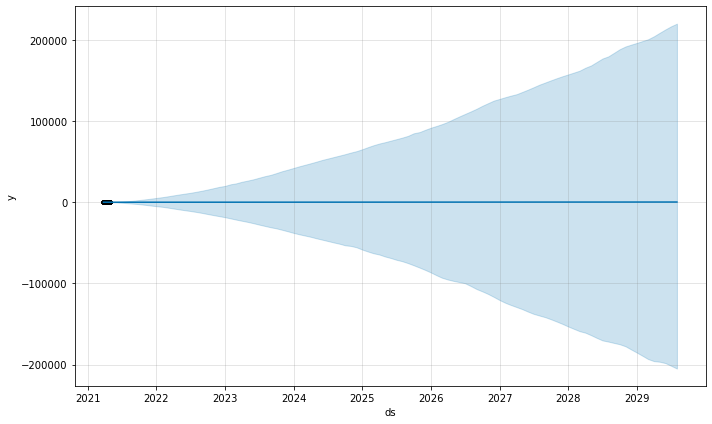

In [56]:
plot1 = m.plot(forecast)

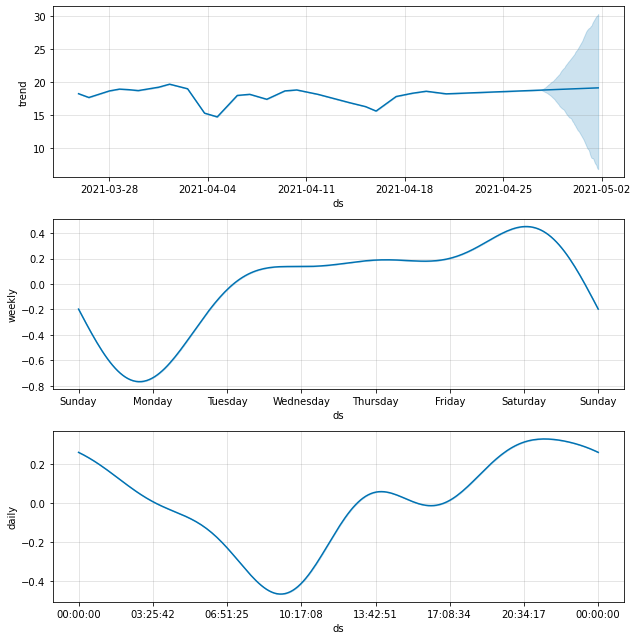

In [54]:
plt2 = m.plot_components(forecast)

In [55]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [53]:

!pip install --upgrade tensorflow

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=65781bca174278b3a7f038bb4afc6da8cfe04a59ea52d41c64c10e3893993a1a
  Stored in directory: c:\users\ahmed\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
Successfully built clang
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\ahmed\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

